# DATA 620 Project 2
**Team 6:** Santosh Manjrekar, Dhananjay Kumar ,Matheesha Thambeliyagodage,Song Yoon(Andy)Hwang

Project Description

The goal of the project is to create and analyze a two-mode social network for Newman's scientific collaboration network. We will be analyzing the relationship between *authors* and *publications* they have jointly worked . 

Specific project requirements:

- Identify a large two-mode network dataset. Data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
- Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
- What can you infer about each of the distinct groups?

We will be extracting following information from the data

- Authors writing most publications
- Which authors collaborate more ?
- Which authors will have more influence on author community ?
- Publications on which most authors collaborated.
- Which publication subject is more popular within authors ?
- Which publications authors tend to collaborate more ?

Data Source

This is the co-authorship network based on preprints posted to Condensed Matter section of arXiv E-Print Archive between 1995 and 1999. This dataset can be classified as a two-mode or affiliation network since there are two types of “modes” (authors and papers) and connections exist only between different types of nodes. 

Data Import

After downloading data from http://opsahl.co.uk/tnet/datasets/Newman-Cond_mat_95-99-two_mode.txt and saved it on the local file system.

In [1]:
#Libraries used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
from networkx.algorithms import bipartite

In [2]:
# loading author research paper data
data_author_paper = "Newman-Cond_mat_95-99-two_mode.txt"
author_publications = pd.read_csv(data_author_paper, delim_whitespace=True, header=None, names=['Author', 'Publication'])

#For our study we will consider only 1000 records
author_publications = author_publications.iloc[0:1000]




In [3]:
##Update the author name and publication name so that it is readable
for x in range(1000):
    authorname = author_publications.loc[x,'Author']
    author_publications.loc[x,'Author']= "Auth"+str(authorname)
    authorname = author_publications.loc[x,'Publication']
    author_publications.loc[x,'Publication']= "Pub"+str(authorname)



In [4]:
author_publications.head()

Author Publication
0  Auth1        Pub1
1  Auth1      Pub469
2  Auth1      Pub563
3  Auth1      Pub813
4  Auth1     Pub1361

In [5]:
#Let create small dataset so that we can look at tow-mode graph
auth_pub_small = author_publications.iloc[0:100]

In [6]:
auth_pub_small.head()

Author Publication
0  Auth1        Pub1
1  Auth1      Pub469
2  Auth1      Pub563
3  Auth1      Pub813
4  Auth1     Pub1361

In [7]:
# Total number of Authors
len(auth_pub_small.Author.unique())

6

In [8]:
# Total number of Pulications
len(auth_pub_small.Publication.unique())

83

In [9]:
# checking no of pubications each author participated 
rels = auth_pub_small.groupby('Author')
rels.size()

Author
Auth1    20
Auth2     3
Auth3     2
Auth4    56
Auth5     6
Auth6    13
dtype: int64

In [10]:
#Seperate data into Authors and Publications
small_authList = auth_pub_small.Author.unique()
small_pubList = auth_pub_small.Publication.unique()

small_authList = small_authList.tolist()
small_pubList = small_pubList.tolist()



###Two-mode Network Graph

Following graph shows two sets of nodes and relationships between sets. The first set of nodes are Authors and second set is a publication papers. Sets of nodes are related, but there is no relation between each set of nodes. This shows there is no connection between Authors. We can also notice there is no link between publications.

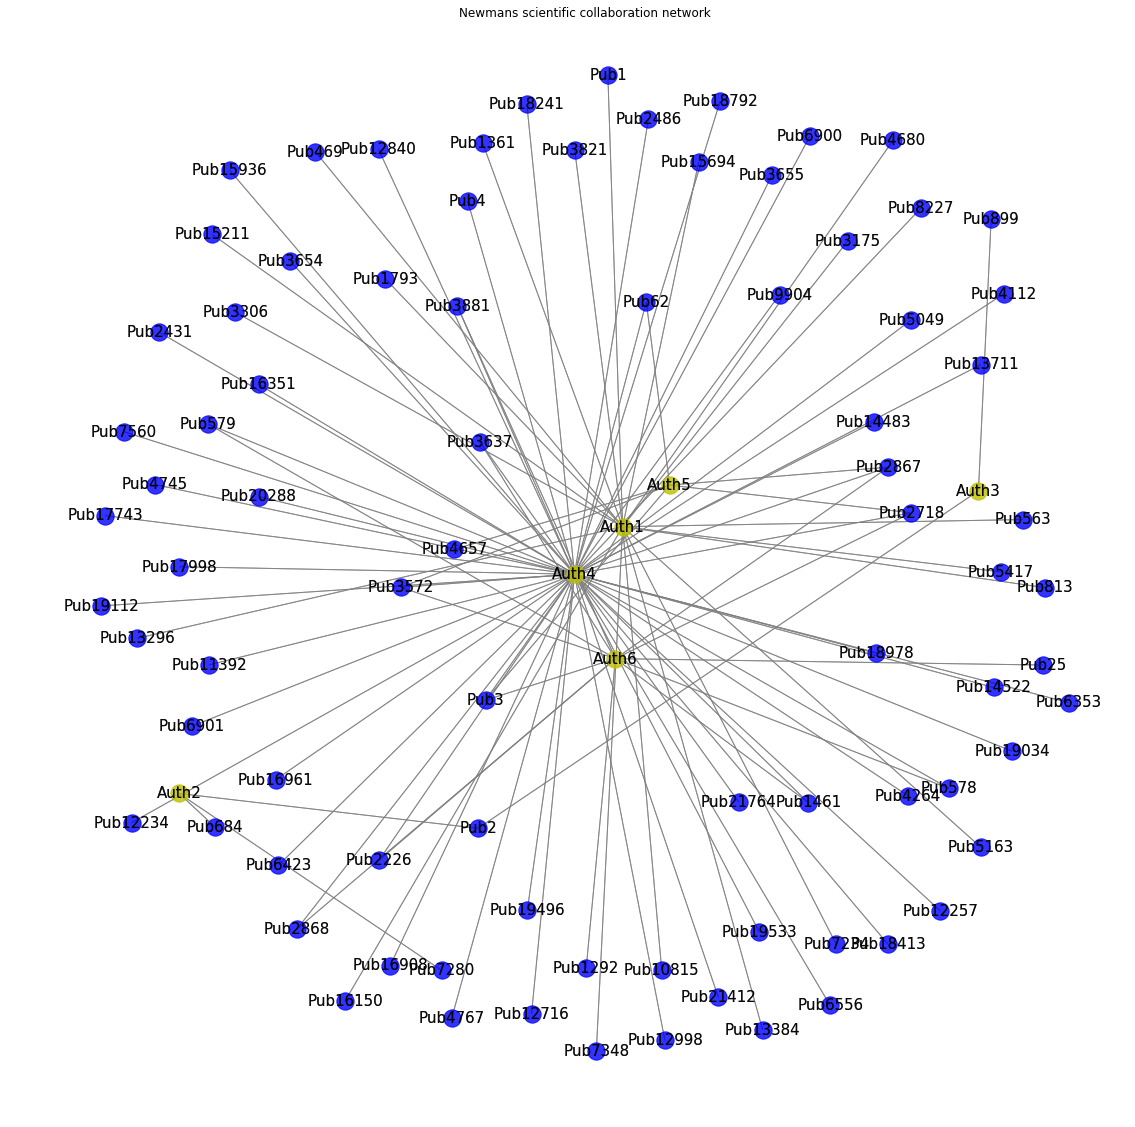

In [11]:
#Small subset data to show two-mode graph
%matplotlib inline


fig = plt.figure(figsize=(15, 15))

B = nx.Graph()
B.add_nodes_from(small_authList,color='y', bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(small_pubList,color='b', bipartite=1)

for index, row in auth_pub_small.iterrows():
    B.add_edge(row['Author'], row['Publication'])


    

pos = nx.spring_layout(B, k=0.5, iterations=25)
nx.draw(B, nodelist = small_authList, with_labels=True, pos=pos, font_size=15, alpha=.8, edge_color = 'grey', node_color='y',arrows=True)
nx.draw(B, nodelist = small_pubList, with_labels=True, pos=pos, font_size=15, alpha=.8, edge_color = 'grey',  node_color='b', arrows=True)

plt.title('Newmans scientific collaboration network')
plt.show()   




In [12]:
authorList = author_publications.Author.unique()
authorList = authorList.tolist()
print(len(authorList))
pubList = author_publications.Publication.unique()
pubList = pubList.tolist()
print(len(pubList))

64
848


In [13]:
# checking no of pubications each author participated 
rels = author_publications.groupby('Author')
rels.size()

Author
Auth1     20
Auth10     1
Auth11    11
Auth12     1
Auth13     3
Auth14     1
Auth15    37
Auth16    17
Auth17    40
Auth18    16
Auth19     4
Auth2      3
Auth20     7
Auth21     1
Auth22    30
Auth23     3
Auth24    14
Auth25     9
Auth26    10
Auth27    17
Auth28    18
Auth29     1
Auth3      2
Auth30    21
Auth31     7
Auth32    12
Auth33    12
Auth34     2
Auth35    12
Auth36    70
          ..
Auth40    13
Auth41     1
Auth42     2
Auth43    30
Auth44    10
Auth45     4
Auth46     6
Auth47    13
Auth48    18
Auth49    19
Auth5      6
Auth50    18
Auth51     5
Auth52    39
Auth53    34
Auth54    28
Auth55    14
Auth56    21
Auth57    16
Auth58    14
Auth59    37
Auth6     40
Auth60     7
Auth61     7
Auth62    17
Auth63     1
Auth64     7
Auth7      7
Auth8     17
Auth9     19
Length: 64, dtype: int64

Following is an entire two-mode graph showing a relationship between Authors and Publications. We will be working with the whole dataset for the rest of the project.

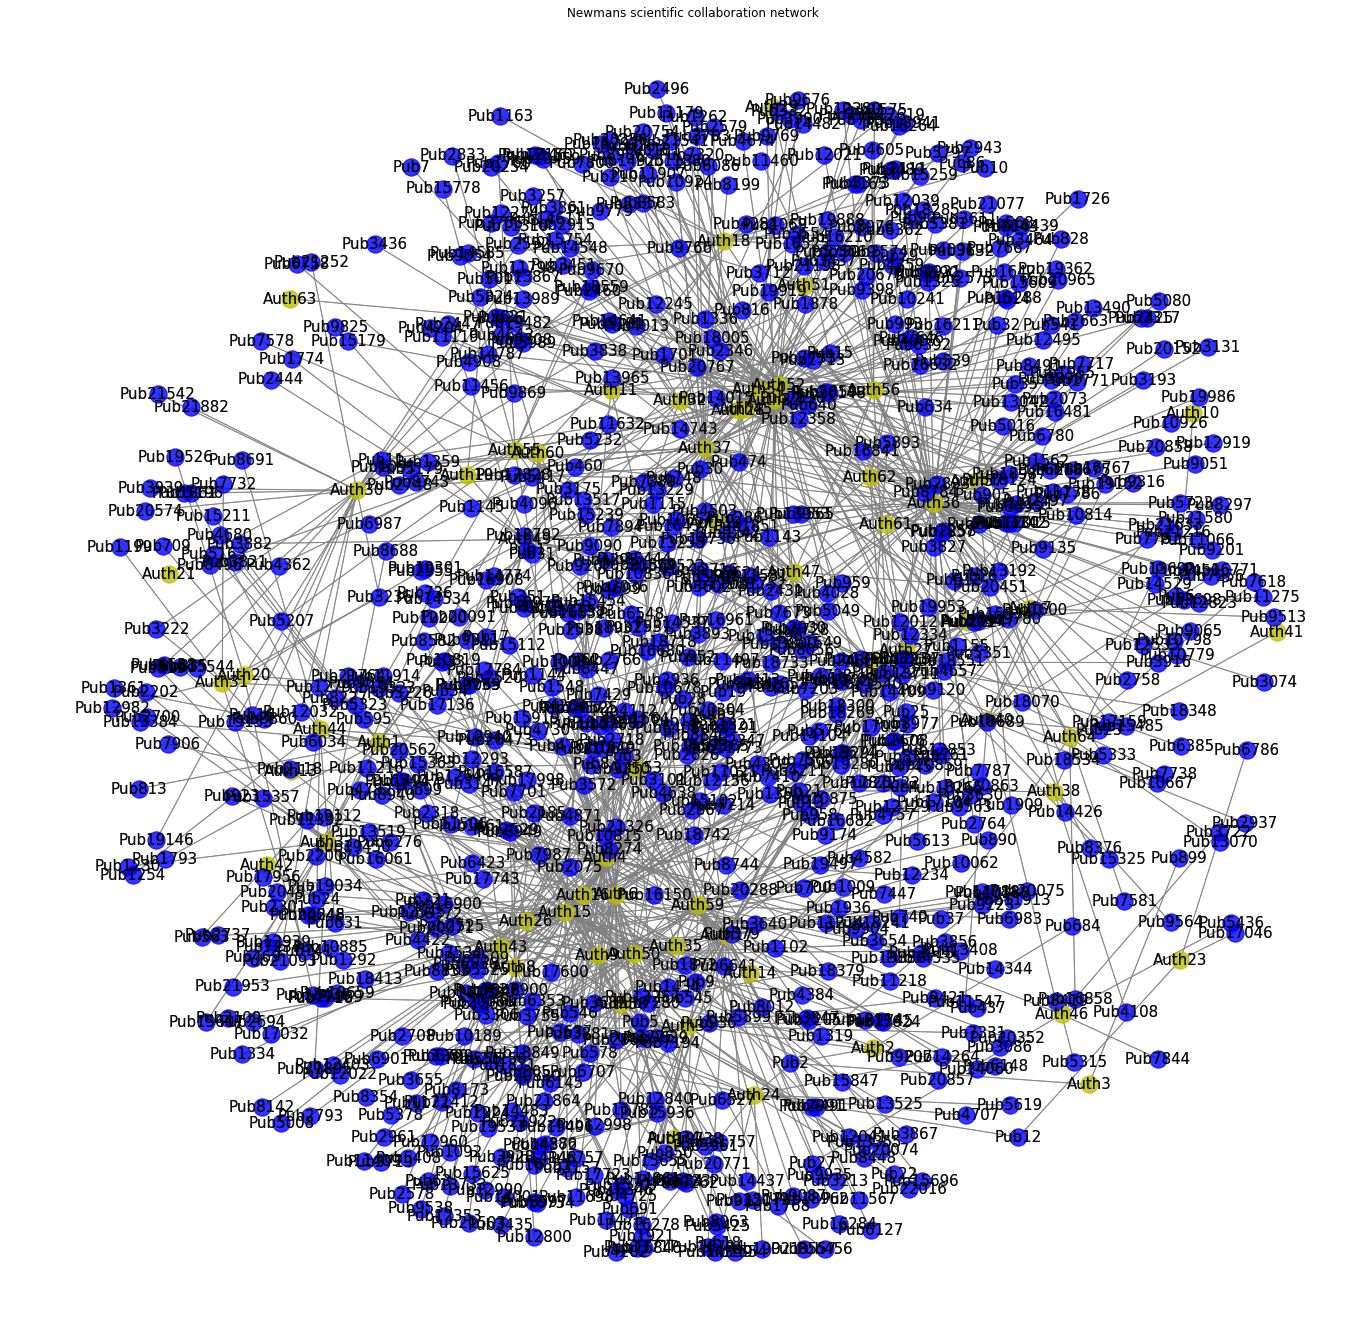

In [14]:
%matplotlib inline
fig = plt.figure(figsize=(18, 18))
B = nx.Graph()
B.add_nodes_from(authorList, bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(pubList, bipartite=1)

for index, row in author_publications.iterrows():
    B.add_edge(row['Author'], row['Publication'])

#pos = nx.spring_layout(B, k=0.5, iterations=2)
pos = nx.spring_layout(B, k=0.3, iterations=75)
nx.draw(B, nodelist = authorList, with_labels=True, pos=pos, font_size=15, alpha=.8, edge_color = 'grey', node_color = 'y', arrows=True)
nx.draw(B, nodelist = pubList, with_labels=True, pos=pos, font_size=15, alpha=.8, edge_color = 'grey', node_color = 'b', arrows=True)

plt.title('Newmans scientific collaboration network')
plt.show()

Get information about node sets. There are 64 Authors and 848 publications.

In [15]:
nx.is_connected(B), nx.is_bipartite(B)

(False, True)

This network is pretty large and graph is disconnected. Let's look at the max size subgraph for our study.

In [16]:
B_max = max(nx.connected_component_subgraphs(B), key=len)

In [17]:
nx.is_connected(B_max),nx.is_bipartite(B_max)

(True, True)

In [18]:
nx.number_of_nodes(B_max)

184

In [19]:
top_nodes = {n for n, d in B_max.nodes(data=True) if d['bipartite']==1}
bottom_nodes = set(B_max) - top_nodes

In [20]:
sorted(B_max.degree, key=lambda x: x[1], reverse=True)

[('Auth52', 39),
 ('Auth59', 37),
 ('Auth53', 34),
 ('Auth22', 30),
 ('Auth27', 17),
 ('Auth26', 10),
 ('Auth25', 9),
 ('Auth20', 7),
 ('Auth60', 7),
 ('Auth51', 5),
 ('Pub11', 4),
 ('Auth19', 4),
 ('Pub34', 3),
 ('Pub13', 3),
 ('Pub958', 3),
 ('Pub29', 2),
 ('Pub1115', 2),
 ('Pub2538', 2),
 ('Pub30', 2),
 ('Pub10241', 2),
 ('Pub9766', 2),
 ('Pub5554', 2),
 ('Pub1144', 2),
 ('Pub10084', 2),
 ('Pub6728', 2),
 ('Pub1851', 2),
 ('Pub2537', 2),
 ('Pub1143', 2),
 ('Pub8784', 2),
 ('Pub12012', 2),
 ('Pub5759', 2),
 ('Pub14736', 2),
 ('Pub2497', 2),
 ('Pub4503', 2),
 ('Pub8376', 1),
 ('Pub634', 1),
 ('Pub14344', 1),
 ('Pub17784', 1),
 ('Pub3289', 1),
 ('Pub923', 1),
 ('Pub8744', 1),
 ('Pub5509', 1),
 ('Pub9034', 1),
 ('Pub1155', 1),
 ('Pub4738', 1),
 ('Pub12982', 1),
 ('Pub4028', 1),
 ('Pub7717', 1),
 ('Pub11021', 1),
 ('Pub5621', 1),
 ('Pub748', 1),
 ('Pub12853', 1),
 ('Pub6983', 1),
 ('Pub6527', 1),
 ('Pub9869', 1),
 ('Pub540', 1),
 ('Pub9563', 1),
 ('Pub11138', 1),
 ('Pub6780', 1),
 ('Pub9

In [21]:
#Graph can be queried to get information about node sets
#top_nodes, bottom_nodes = bipartite.sets(B)

#Total of 172 publications
print (len(top_nodes))
print (len(bottom_nodes))


172
12


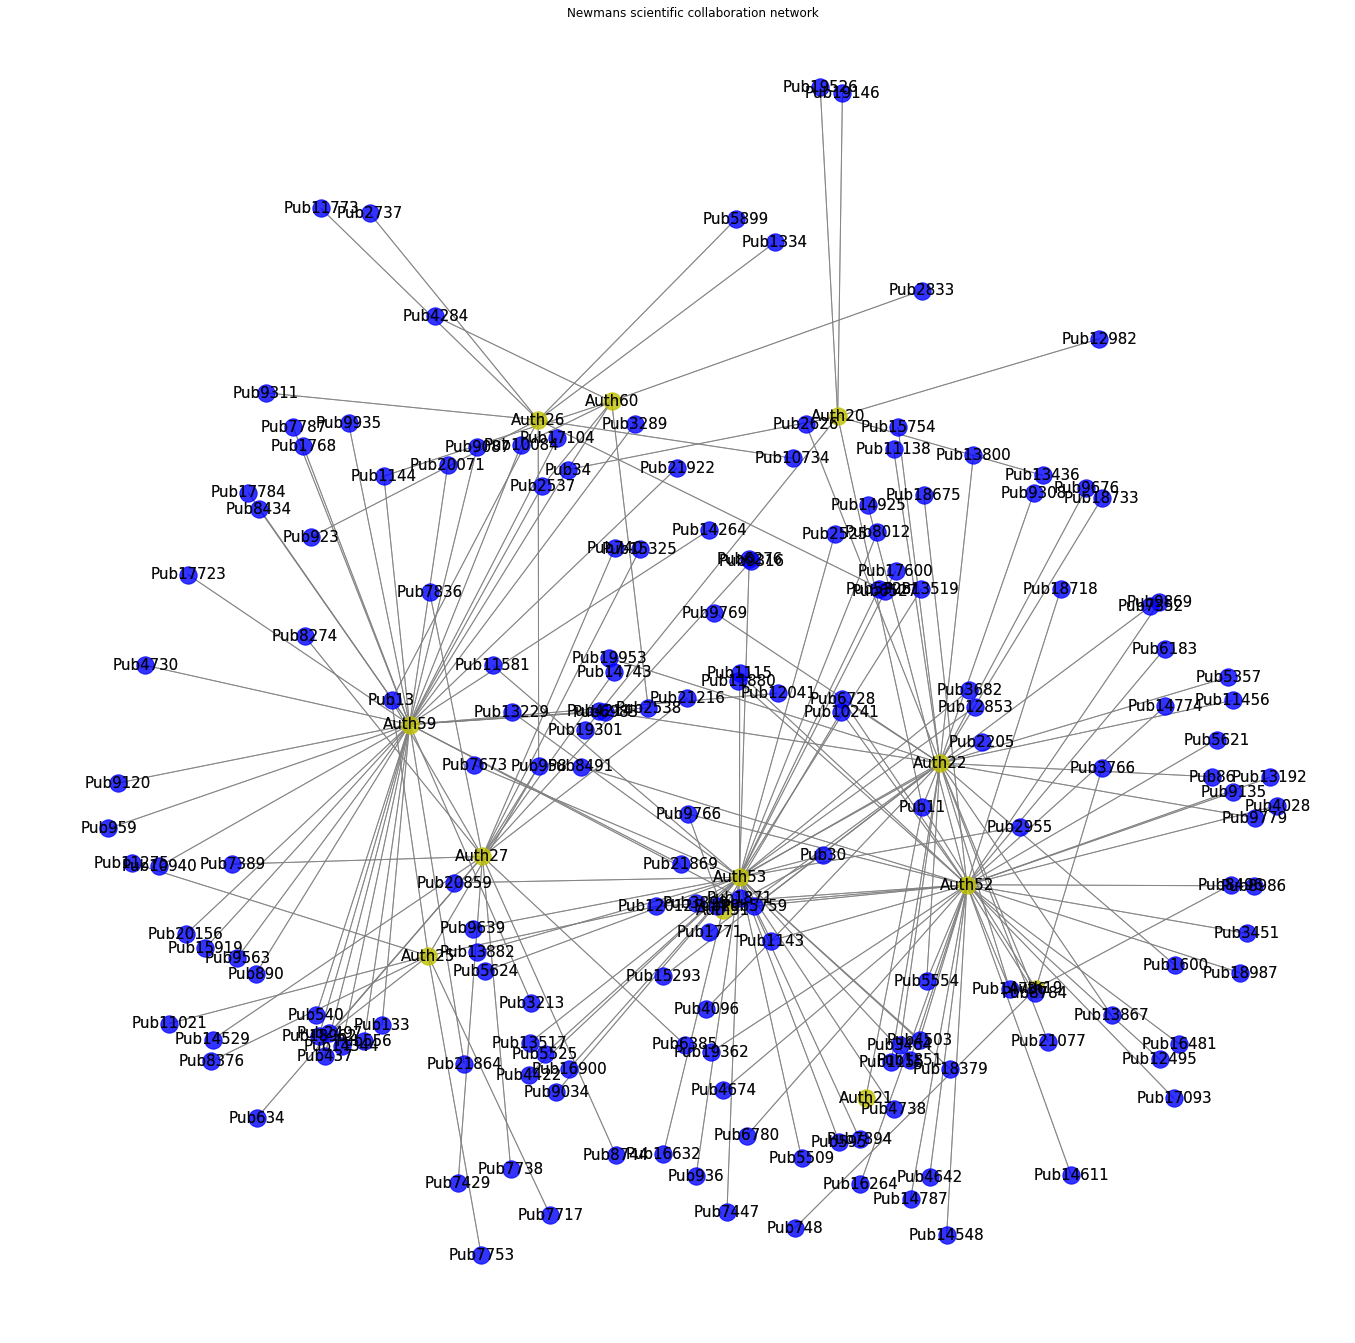

In [22]:
%matplotlib inline
fig = plt.figure(figsize=(18, 18))
B = nx.Graph()
B.add_nodes_from(authorList, bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(pubList, bipartite=1)

for index, row in author_publications.iterrows():
    B.add_edge(row['Author'], row['Publication'])

#pos = nx.spring_layout(B, k=0.5, iterations=2)
pos = nx.spring_layout(B, k=0.3, iterations=75)
nx.draw(B_max, nodelist = bottom_nodes, with_labels=True, pos=pos, font_size=15, alpha=.8, edge_color = 'grey', node_color = 'y', arrows=True)
nx.draw(B_max, nodelist = top_nodes, with_labels=True, pos=pos, font_size=15, alpha=.8, edge_color = 'grey', node_color = 'b', arrows=True)

plt.title('Newmans scientific collaboration network')
plt.show()

In [23]:
#From the graph looks like Auth52, Auth59 have written multiple publications.
#Authors
df = pd.DataFrame(list(top_nodes), columns=['Publication'])
df

Publication
0       Pub8376
1         Pub34
2        Pub634
3      Pub14344
4         Pub29
5       Pub1115
6      Pub17784
7       Pub3289
8        Pub923
9       Pub8744
10      Pub5509
11      Pub9034
12      Pub1155
13      Pub4738
14     Pub12982
15      Pub4028
16      Pub2538
17      Pub7717
18     Pub11021
19      Pub5621
20       Pub748
21     Pub12853
22      Pub6983
23      Pub6527
24      Pub9869
25       Pub540
26      Pub9563
27     Pub11138
28      Pub6780
29        Pub30
..          ...
142     Pub5899
143    Pub19362
144       Pub86
145    Pub11456
146     Pub9308
147     Pub7738
148      Pub958
149     Pub9311
150     Pub5759
151    Pub14736
152     Pub4284
153     Pub3213
154     Pub2525
155     Pub6183
156    Pub14611
157     Pub9769
158     Pub6385
159    Pub13800
160     Pub2497
161    Pub20071
162      Pub133
163    Pub19953
164     Pub4503
165      Pub959
166      Pub595
167      Pub890
168    Pub16264
169    Pub10734
170    Pub10940
171    Pub13229

[172 rows x 1 columns]

In [24]:
#Total of 12 Authors
print (len(bottom_nodes))

#Authors
df_author = pd.DataFrame(list(bottom_nodes), columns=['Author'])
df_author

12


Author
0   Auth52
1   Auth19
2   Auth26
3   Auth21
4   Auth60
5   Auth59
6   Auth25
7   Auth53
8   Auth20
9   Auth51
10  Auth22
11  Auth27

In [25]:
#Get total number of nodes in the graph (Authors + Publications)
bipartite.sets(B_max)
nx.number_of_nodes(B_max)

184

In [26]:
#Diameter of the graph. 
print(B_max.size())

200


In [27]:
#Displays information how nodes are grouped inside the graph
#Publication bipartite value is 1 and Author bipartite value is 0
df = pd.DataFrame(list(bipartite.color(B_max).items()), columns=['Node', 'bipartite'])
df.sort_values(['bipartite', 'Node'], ascending = True, inplace=True)
df

Node  bipartite
100    Auth19          0
99     Auth20          0
101    Auth21          0
73     Auth22          0
1      Auth25          0
25     Auth26          0
10     Auth27          0
151    Auth51          0
34     Auth52          0
154    Auth53          0
111    Auth59          0
112    Auth60          0
116  Pub10084          1
56   Pub10241          1
33   Pub10734          1
148  Pub10940          1
81      Pub11          1
3    Pub11021          1
75   Pub11138          1
36    Pub1115          1
4    Pub11275          1
37    Pub1143          1
115   Pub1144          1
94   Pub11456          1
74    Pub1155          1
165  Pub11581          1
29   Pub11773          1
57   Pub11880          1
7    Pub12012          1
130  Pub12041          1
..        ...        ...
177   Pub8012          1
19    Pub8274          1
0     Pub8376          1
139   Pub8434          1
50    Pub8491          1
104   Pub8496          1
86      Pub86          1
12    Pub8744          1
51    Pub8784          1
144    Pub890          1
52    Pub8986          1
156   Pub9034          1
127   Pub9087          1
128   Pub9120          1
53    Pub9135          1
26     Pub923          1
92    Pub9308          1
32    Pub9311          1
20    Pub9316          1
159    Pub936          1
124   Pub9563          1
8      Pub958          1
145    Pub959          1
160   Pub9639          1
80    Pub9676          1
54    Pub9766          1
93    Pub9769          1
83    Pub9779          1
55    Pub9869          1
135   Pub9935          1

[184 rows x 2 columns]

#Metrics and Inference

###Shortest Path

Function *shortest_path_length* of *NetworkX* library allows us to find the *Shortest Path* from a specific origin to a specified destination in a given network while minimizing the total cost associated with the path. 



In [28]:
#Gives information about average shortest path between nodes 
nx.average_shortest_path_length(B_max)
#print(nx.info(B_max))

5.970301734378713

In [29]:
#Shortest path between Authors and Publication
df = pd.DataFrame(list(bipartite.color(B_max).items()), columns=['Node', 'bipartite'])
df1 = df[(df.bipartite == 1)]
df2 = df[(df.bipartite == 0)]

cols = ['Publication', 'Author', 'ShortestPath']
lst = []
for i1, m1 in df1.iterrows():
    for i2, m2 in df2.iterrows():
        s1 = m1[0]
        s2 = m2[0]
        e = False
        if [s1, s2, nx.shortest_path_length(B_max, s1, s2)] in lst:
            e = True
        if [s2, s1, nx.shortest_path_length(B_max, s1, s2)] in lst:
            e = True
        if not e:
            lst.append([s1, s2, nx.shortest_path_length(B_max, s1, s2)])

ShortPath = pd.DataFrame(lst, columns=cols)
ShortPath.sort_values(['ShortestPath', 'Publication', 'Author'], ascending = True, inplace=True)
ShortPath

Publication  Author  ShortestPath
1280    Pub10084  Auth59             1
1281    Pub10084  Auth60             1
634     Pub10241  Auth51             1
627     Pub10241  Auth52             1
362     Pub10734  Auth26             1
1664    Pub10940  Auth59             1
918        Pub11  Auth19             1
917        Pub11  Auth20             1
919        Pub11  Auth21             1
916        Pub11  Auth22             1
24      Pub11021  Auth25             1
844     Pub11138  Auth22             1
387      Pub1115  Auth52             1
395      Pub1115  Auth53             1
36      Pub11275  Auth25             1
399      Pub1143  Auth52             1
407      Pub1143  Auth53             1
1268     Pub1144  Auth59             1
1269     Pub1144  Auth60             1
1072    Pub11456  Auth22             1
832      Pub1155  Auth22             1
1847    Pub11581  Auth53             1
314     Pub11773  Auth26             1
639     Pub11880  Auth52             1
72      Pub12012  Auth25             1
75      Pub12012  Auth52             1
1448    Pub12041  Auth59             1
651     Pub12495  Auth52             1
1763    Pub12853  Auth53             1
1181    Pub12982  Auth20             1
...          ...     ...           ...
188      Pub7738  Auth59            11
189      Pub7738  Auth60            11
1586     Pub7787  Auth26            11
1585     Pub7787  Auth27            11
200      Pub7836  Auth59            11
201      Pub7836  Auth60            11
212      Pub8274  Auth59            11
213      Pub8274  Auth60            11
1550     Pub8434  Auth26            11
1549     Pub8434  Auth27            11
128      Pub8744  Auth59            11
129      Pub8744  Auth60            11
1610      Pub890  Auth26            11
1609      Pub890  Auth27            11
1406     Pub9087  Auth26            11
1405     Pub9087  Auth27            11
1418     Pub9120  Auth26            11
1417     Pub9120  Auth27            11
284       Pub923  Auth59            11
285       Pub923  Auth60            11
356      Pub9311  Auth59            11
357      Pub9311  Auth60            11
224      Pub9316  Auth59            11
225      Pub9316  Auth60            11
1370     Pub9563  Auth26            11
1369     Pub9563  Auth27            11
1622      Pub959  Auth26            11
1621      Pub959  Auth27            11
1502     Pub9935  Auth26            11
1501     Pub9935  Auth27            11

[2064 rows x 3 columns]

###Node centralities

We will be showing metrics

- Closeness - Closeness is the inverse sum of all shortest paths
- Betweenness - Number of shortest paths that pass through a node
- Degree - The number other nodes that a node is connected to

In our case, Author52 tops the list in all three metrics. 
Looking at the degree value we can say that Author52 has written most of the pubications and ublication pub11 is written by most of the authors.Publications with higher degree will have higher closeness.

In [31]:
#Closeness Betweenness Degrees centrality between Publications and Authors
close = nx.closeness_centrality(B_max)
between = nx.betweenness_centrality(B_max)
degree = nx.degree_centrality(B_max)
df1 = pd.DataFrame(list(close.items()), columns=['Node', 'Closeness'])
df2 = pd.DataFrame(list(between.items()), columns=['Node', 'Betweenness'])
df3 = pd.DataFrame(list(degree.items()), columns=['Node', 'Degrees'])
df = df1.join(df2.set_index('Node'), on='Node').join(df3.set_index('Node'), on='Node')
df.sort_values(['Closeness', 'Betweenness','Degrees'], ascending = False, inplace=True)
#df.sort_values(['Degrees','Betweenness','Closeness'], ascending = False, inplace=True)
#df.sort_values(['Betweenness','Degrees','Closeness'], ascending = False, inplace=True)
df

Node  Closeness  Betweenness   Degrees
12     Auth52   0.264451     0.721101  0.213115
48    Pub5554   0.254875     0.094614  0.010929
79    Pub6728   0.254875     0.094614  0.010929
114   Pub8784   0.254875     0.094614  0.010929
161   Pub5759   0.254875     0.094614  0.010929
162  Pub14736   0.254875     0.094614  0.010929
120    Auth22   0.247967     0.583378  0.163934
126  Pub12012   0.226485     0.297244  0.010929
5     Pub1115   0.225369     0.067169  0.010929
82    Pub1851   0.225369     0.067169  0.010929
101   Pub1143   0.225369     0.067169  0.010929
175   Pub4503   0.225369     0.067169  0.010929
75      Pub11   0.224265     0.423407  0.021858
4       Pub29   0.210829     0.007120  0.010929
34   Pub10241   0.210829     0.007120  0.010929
45    Pub9766   0.210829     0.007120  0.010929
16    Pub4028   0.209382     0.000000  0.005464
21    Pub5621   0.209382     0.000000  0.005464
26    Pub9869   0.209382     0.000000  0.005464
30    Pub6780   0.209382     0.000000  0.005464
35   Pub14548   0.209382     0.000000  0.005464
40   Pub16481   0.209382     0.000000  0.005464
43   Pub18675   0.209382     0.000000  0.005464
59    Pub4674   0.209382     0.000000  0.005464
62   Pub18987   0.209382     0.000000  0.005464
80    Pub9135   0.209382     0.000000  0.005464
81   Pub13192   0.209382     0.000000  0.005464
84   Pub14774   0.209382     0.000000  0.005464
87   Pub11880   0.209382     0.000000  0.005464
89   Pub18718   0.209382     0.000000  0.005464
..        ...        ...          ...       ...
164   Pub3213   0.140769     0.000000  0.005464
172  Pub20071   0.140769     0.000000  0.005464
173    Pub133   0.140769     0.000000  0.005464
176    Pub959   0.140769     0.000000  0.005464
178    Pub890   0.140769     0.000000  0.005464
182  Pub10940   0.140769     0.000000  0.005464
37    Pub2833   0.134559     0.000000  0.005464
163   Pub4284   0.134559     0.000000  0.005464
2      Pub634   0.131466     0.000000  0.005464
9     Pub8744   0.131466     0.000000  0.005464
44    Pub7429   0.131466     0.000000  0.005464
49    Pub7389   0.131466     0.000000  0.005464
52     Pub740   0.131466     0.000000  0.005464
70   Pub15325   0.131466     0.000000  0.005464
78   Pub21216   0.131466     0.000000  0.005464
92   Pub14743   0.131466     0.000000  0.005464
106   Pub7836   0.131466     0.000000  0.005464
113  Pub14529   0.131466     0.000000  0.005464
131   Pub9316   0.131466     0.000000  0.005464
146   Pub8274   0.131466     0.000000  0.005464
158   Pub7738   0.131466     0.000000  0.005464
169   Pub6385   0.131466     0.000000  0.005464
8      Pub923   0.130156     0.000000  0.005464
25    Pub6527   0.130156     0.000000  0.005464
68    Pub1334   0.130156     0.000000  0.005464
99   Pub11773   0.130156     0.000000  0.005464
119   Pub2737   0.130156     0.000000  0.005464
153   Pub5899   0.130156     0.000000  0.005464
160   Pub9311   0.130156     0.000000  0.005464
181  Pub10734   0.130156     0.000000  0.005464

[184 rows x 4 columns]

###Projection

According to the article published by Tore Opsahl, on https://toreopsahl.com/tnet/two-mode-networks/, *Projection* is described as *transforming a two-mode network into a one-mode network*. The process works by selecting one set of nodes and linking two nodes if they are connected to the same node of the other set.

Following is the projected graph of Authors.

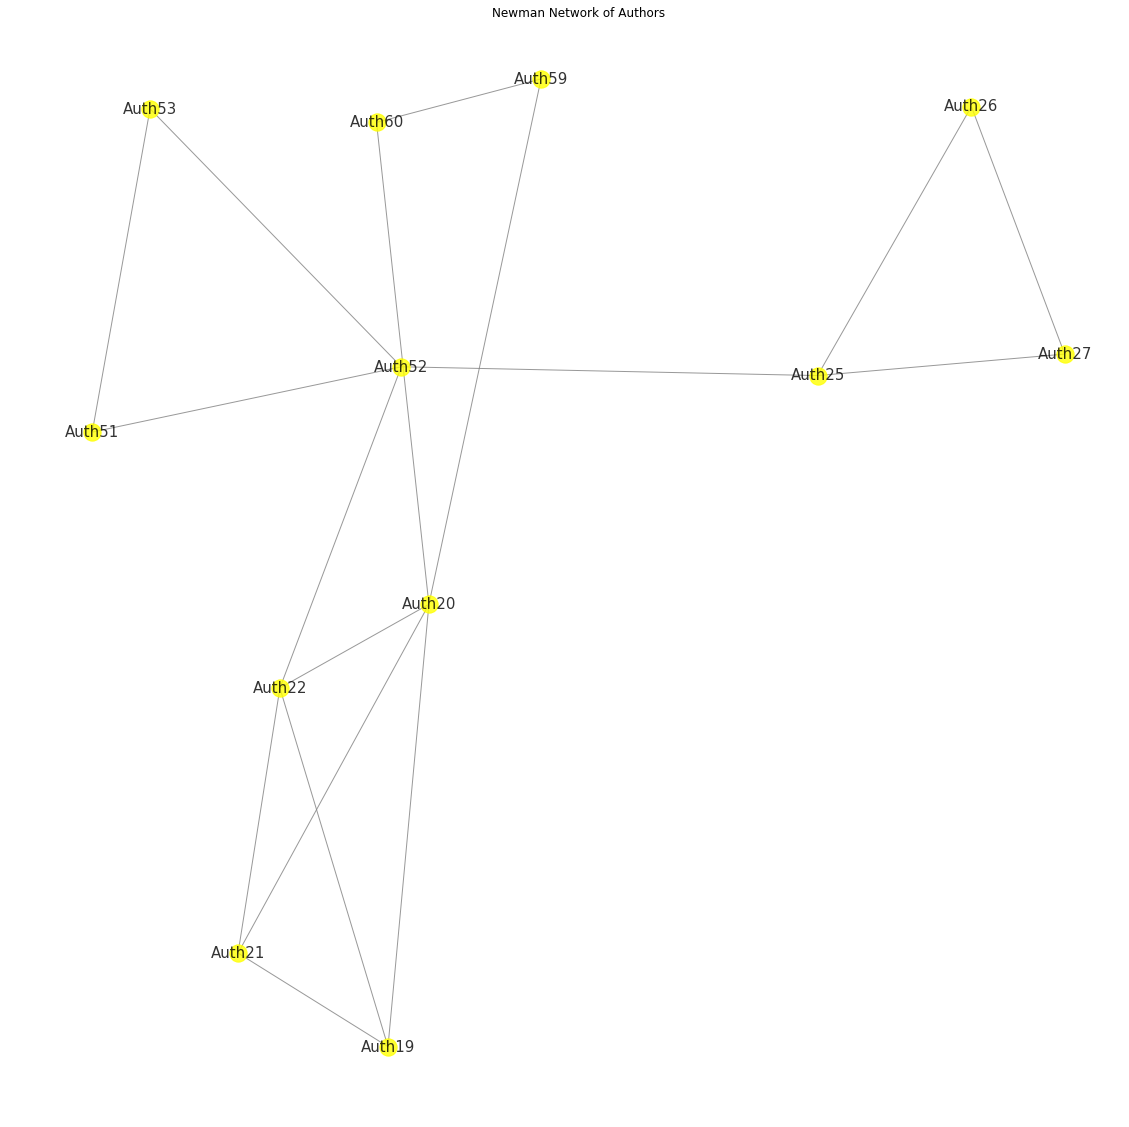

In [80]:
#Graph shows how Authors are connected, Looking at the graph looks like Auth52,Auth22,Auth20 will have 
#higher degree of betweenness which we can verify with above data
G = bipartite.projected_graph(B_max, bottom_nodes, multigraph=False)

%matplotlib inline
fig = plt.figure(figsize=(15, 15))

pos = nx.spring_layout(G, k=0.6, iterations=25)
nx.draw(G, with_labels=True, pos=pos, font_size=15, alpha=.8, edge_color = 'grey', node_color = 'yellow')
plt.title('Newman Network of Authors')
plt.show()

Following network is projected graph of Publications. 

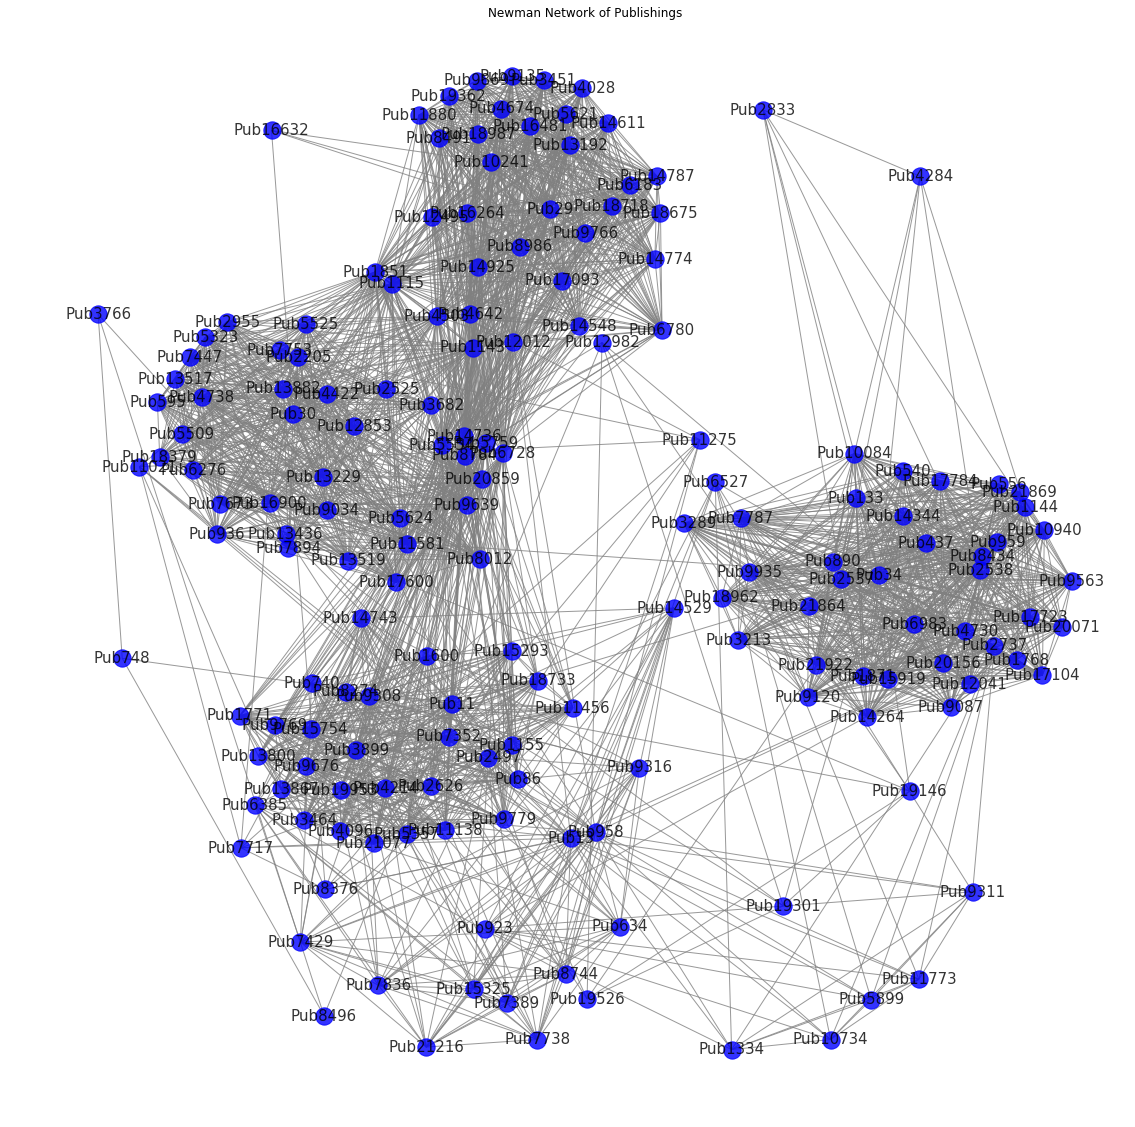

In [82]:
#Graph shows they are connected to the most part.
#Not all publications are linked. Example: publication pub748, pub8496 are not well connected , probably those subjects might
#not linked to each other or they maight be least popular subjects within the scintists. It will be interesting to see
#if we know category of those subjects

G = bipartite.projected_graph(B_max, top_nodes, multigraph=False)

%matplotlib inline
fig = plt.figure(figsize=(15, 15))

pos = nx.spring_layout(G, k=0.5, iterations=25)
nx.draw(G, with_labels=True, pos=pos, font_size=15, alpha=.8, edge_color = 'grey', node_color = 'b')
plt.title('Newman Network of Publishings')
plt.show()

###Density

A Dense graph is a graph in which the number of edges is close to the maximal number of edges. Following shows nodes in each node-set are sparsely dense. Output suggests it is not a dense graph.

In [83]:
#Density
print(bipartite.density(B_max,top_nodes))

print(bipartite.density(B_max,bottom_nodes))

0.09689922480620156
0.09689922480620156


###Clustering

Two-mode clustering metrics show there is a high level of clustering around publications . In other words Publicatins are creating clusters around authors. 

In [57]:
c = bipartite.clustering(B_max)
df = pd.DataFrame(list(c.items()), columns=['Node', 'Clustering'])
df.sort_values(['Clustering', 'Node'], ascending = False, inplace=True)
df

Node  Clustering
75    Pub9935    0.925926
26     Pub959    0.925926
139   Pub9563    0.925926
117   Pub9120    0.925926
112   Pub9087    0.925926
85     Pub890    0.925926
116   Pub8434    0.925926
22    Pub7787    0.925926
161   Pub6983    0.925926
10     Pub556    0.925926
128    Pub540    0.925926
67    Pub4730    0.925926
106    Pub437    0.925926
101   Pub3289    0.925926
48    Pub3213    0.925926
89   Pub21922    0.925926
49   Pub21869    0.925926
83   Pub21864    0.925926
151  Pub20156    0.925926
24   Pub20071    0.925926
36   Pub18962    0.925926
110   Pub1871    0.925926
32   Pub17784    0.925926
172  Pub17723    0.925926
41    Pub1768    0.925926
91   Pub17104    0.925926
3    Pub15919    0.925926
86   Pub14344    0.925926
98   Pub14264    0.925926
132    Pub133    0.925926
..        ...         ...
166   Pub6728    0.505820
57    Pub5759    0.505820
142   Pub5554    0.505820
79   Pub14736    0.505820
30   Pub16632    0.500000
23    Pub4503    0.497549
64    Pub1851    0.497549
124   Pub1143    0.497549
51    Pub1115    0.497549
181   Pub9766    0.479167
103     Pub29    0.479167
65   Pub10241    0.479167
180     Pub30    0.468468
147  Pub12012    0.442029
134    Pub958    0.363889
173     Pub13    0.363889
59      Pub34    0.359848
43      Pub11    0.241228
175    Auth21    0.142063
52     Auth19    0.126768
71     Auth27    0.105217
93     Auth60    0.102564
105    Auth26    0.098824
17     Auth25    0.089786
56     Auth59    0.075730
138    Auth20    0.074163
97     Auth52    0.057636
95     Auth51    0.049743
18     Auth22    0.042385
90     Auth53    0.042143

[184 rows x 2 columns]

###Subgroups

This occurrence of situations in which the nodes of a graph fall into two or more groups with some nodes acting as links between the groups. Following table shows subgroup formation between two different node sets.
Here we can see that which authos worked together on certan publication.

In [84]:
def get_triangles(g):
    nodes = g.nodes()
    for n1 in nodes:
        neighbors1 = set(g[n1])
        for n2 in filter(lambda x: x>n1, nodes):
            neighbors2 = set(g[n2])
            common = neighbors1 & neighbors2
            for n3 in filter(lambda x: x>n2, common):
                yield n1, n2, n3
a = get_triangles(B_max)
df = pd.DataFrame(a)
df.columns = ['node1', 'node2', 'node3']
df

node1   node2     node3
0   Auth52  Auth53   Pub1143
1   Auth52  Auth53   Pub1115
2   Auth52  Auth53   Pub1851
3   Auth52  Auth53   Pub4503
4   Auth19  Auth21     Pub11
5   Auth19  Auth20     Pub11
6   Auth19  Auth22     Pub11
7   Auth21  Auth22     Pub11
8   Auth59  Auth60   Pub2538
9   Auth59  Auth60  Pub10084
10  Auth59  Auth60   Pub2537
11  Auth59  Auth60     Pub34
12  Auth59  Auth60   Pub1144
13  Auth26  Auth27     Pub13
14  Auth26  Auth27    Pub958
15  Auth20  Auth21     Pub11
16  Auth20  Auth59     Pub34
17  Auth20  Auth60     Pub34
18  Auth20  Auth22     Pub11
19  Auth22  Auth52  Pub14736
20  Auth22  Auth52   Pub6728
21  Auth22  Auth52   Pub5554
22  Auth22  Auth52   Pub5759
23  Auth22  Auth52   Pub8784
24  Auth25  Auth52  Pub12012
25  Auth25  Auth26     Pub13
26  Auth25  Auth26    Pub958
27  Auth25  Auth27     Pub13
28  Auth25  Auth27    Pub958
29  Auth25  Auth27   Pub2497
30  Auth51  Auth52   Pub9766
31  Auth51  Auth52  Pub10241
32  Auth51  Auth52     Pub29
33  Auth51  Auth53     Pub30

###Cliques

A clique is defined as a maximal complete subgraph of a given graph. Example: a group of nodes where every node is connected directly to every other node. The word *maximal* means that no other nodes can be added to the clique without making it less connected.

When the entire two-node graph is checked for cliques, Author52 and Author59 ranked on the top. 

Author52 and Author59 creates more publications  creating more cliques.

In [85]:
c = nx.number_of_cliques(B_max)
df = pd.DataFrame(list(c.items()), columns=['Node', 'Cliques'])
df.sort_values(['Cliques', 'Node'], ascending = False, inplace=True)
df

Node  Cliques
18     Auth52       39
87     Auth59       37
103    Auth53       34
123    Auth22       30
172    Auth27       17
101    Auth26       10
142    Auth25        9
107    Auth60        7
113    Auth20        7
166    Auth51        5
77      Pub11        4
61     Auth19        4
128    Pub958        3
68      Pub34        3
17      Pub13        3
130   Pub9766        2
29    Pub8784        2
48    Pub6728        2
174   Pub5759        2
145   Pub5554        2
78    Pub4503        2
109     Pub30        2
139     Pub29        2
35    Pub2538        2
154   Pub2537        2
162   Pub2497        2
121   Pub1851        2
98   Pub14736        2
82   Pub12012        2
32    Pub1144        2
..        ...      ...
41   Pub14611        1
137  Pub14548        1
33   Pub14529        1
38   Pub14344        1
60   Pub14264        1
27   Pub13882        1
175  Pub13867        1
55   Pub13800        1
135  Pub13519        1
39   Pub13517        1
156  Pub13436        1
10    Pub1334        1
116    Pub133        1
127  Pub13229        1
182  Pub13192        1
125  Pub12982        1
152  Pub12853        1
57   Pub12495        1
150  Pub12041        1
106  Pub11880        1
179  Pub11773        1
134  Pub11581        1
176   Pub1155        1
74   Pub11456        1
183  Pub11275        1
2    Pub11138        1
108  Pub11021        1
163  Pub10940        1
46   Pub10734        1
86     Auth21        1

[184 rows x 2 columns]

On a projected graph, following table, shows subgroups among publications. These publications are more popular among authors.

In [35]:
def get_triangles(g):
    nodes = g.nodes()
    for n1 in nodes:
        neighbors1 = set(g[n1])
        for n2 in filter(lambda x: x>n1, nodes):
            neighbors2 = set(g[n2])
            common = neighbors1 & neighbors2
            for n3 in filter(lambda x: x>n2, common):
                yield n1, n2, n3

a = get_triangles(G)
df = pd.DataFrame(a)
df.columns = ['node1', 'node2', 'node3']
df

node1     node2    node3
0       Pub8376    Pub923   Pub958
1       Pub8376   Pub8744   Pub958
2       Pub8376   Pub9316   Pub958
3       Pub8376   Pub9311   Pub958
4         Pub34   Pub6983  Pub9935
5         Pub34   Pub6983  Pub9087
6         Pub34   Pub6983  Pub9120
7         Pub34   Pub6983  Pub8434
8         Pub34   Pub6983  Pub9563
9         Pub34   Pub6983  Pub7787
10        Pub34   Pub6983   Pub959
11        Pub34   Pub6983   Pub890
12        Pub34    Pub540  Pub9935
13        Pub34    Pub540   Pub556
14        Pub34    Pub540  Pub9087
15        Pub34    Pub540  Pub9120
16        Pub34    Pub540  Pub6983
17        Pub34    Pub540  Pub8434
18        Pub34    Pub540  Pub9563
19        Pub34    Pub540  Pub7787
20        Pub34    Pub540   Pub959
21        Pub34    Pub540   Pub890
22        Pub34   Pub9563  Pub9935
23        Pub34   Pub9563   Pub959
24        Pub34    Pub556  Pub9935
25        Pub34    Pub556  Pub9087
26        Pub34    Pub556  Pub9120
27        Pub34    Pub556  Pub6983
28        Pub34    Pub556  Pub8434
29        Pub34    Pub556  Pub9563
...         ...       ...      ...
31129  Pub13229   Pub2525  Pub4503
31130  Pub13229   Pub2525   Pub595
31131  Pub13229   Pub2525  Pub4422
31132  Pub13229   Pub2525  Pub3682
31133  Pub13229  Pub14611  Pub4503
31134  Pub13229  Pub14611  Pub1851
31135  Pub13229   Pub4503  Pub7894
31136  Pub13229   Pub4503  Pub5525
31137  Pub13229   Pub4503  Pub6276
31138  Pub13229   Pub4503  Pub8012
31139  Pub13229   Pub4503  Pub5509
31140  Pub13229   Pub4503  Pub5323
31141  Pub13229   Pub4503  Pub9034
31142  Pub13229   Pub4503  Pub7673
31143  Pub13229   Pub4503  Pub7447
31144  Pub13229   Pub4503  Pub4738
31145  Pub13229   Pub4503  Pub5624
31146  Pub13229   Pub4503   Pub936
31147  Pub13229   Pub4503  Pub9639
31148  Pub13229   Pub4503   Pub595
31149  Pub13229    Pub595  Pub7894
31150  Pub13229    Pub595  Pub6276
31151  Pub13229    Pub595  Pub8012
31152  Pub13229    Pub595  Pub9034
31153  Pub13229    Pub595  Pub7673
31154  Pub13229    Pub595  Pub7447
31155  Pub13229    Pub595   Pub936
31156  Pub13229    Pub595  Pub9639
31157  Pub13229  Pub16264  Pub4503
31158  Pub13229  Pub16264  Pub1851

[31159 rows x 3 columns]

###Final Analysis

- Authors :

    Author52 and Author59 wrote most of the publications.
    Authors with higher betweenness are influencial authors in the network
    Authors with more closeness centrality collaborated more
  
- Publications on which most Authors collaborated:

   publication pub11 was the publication written in collaboration with most number of authors.
   By looking at the publication subject we can make some assumptions about which subject is more popular
   between the others or which subject authors want to collaborate.
   


###Future enhancements

Add attributes to the author(gender,age, education etc) nodes and publication nodes like subject etc and draw more inferences

